# Importing libraries

In [1]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report
from sklearn import metrics
%matplotlib inline

# Loading data

In [2]:
train = pd.read_csv("/kaggle/input/phishing-legitimate-full/Phishing_Legitimate_full.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [3]:
train.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
train.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

5000 times 0 repeated in Result
5000 times 1 repeated in Result


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CLASS_LABEL', ylabel='count'>

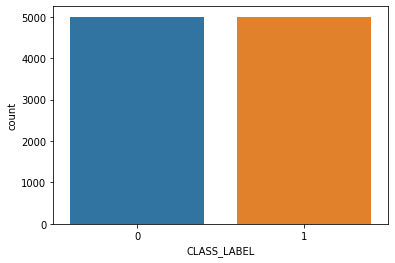

In [8]:
#Looking at the count of phishing and legitmate entries in our training dataset
a=len(train[train.CLASS_LABEL==0])
b=len(train[train.CLASS_LABEL==1])
print(a,"times 0 repeated in Result")
print(b,"times 1 repeated in Result")
sns.countplot(train['CLASS_LABEL'])

**Note:** From the above countplot the data isn't much imbalanced.

<AxesSubplot:>

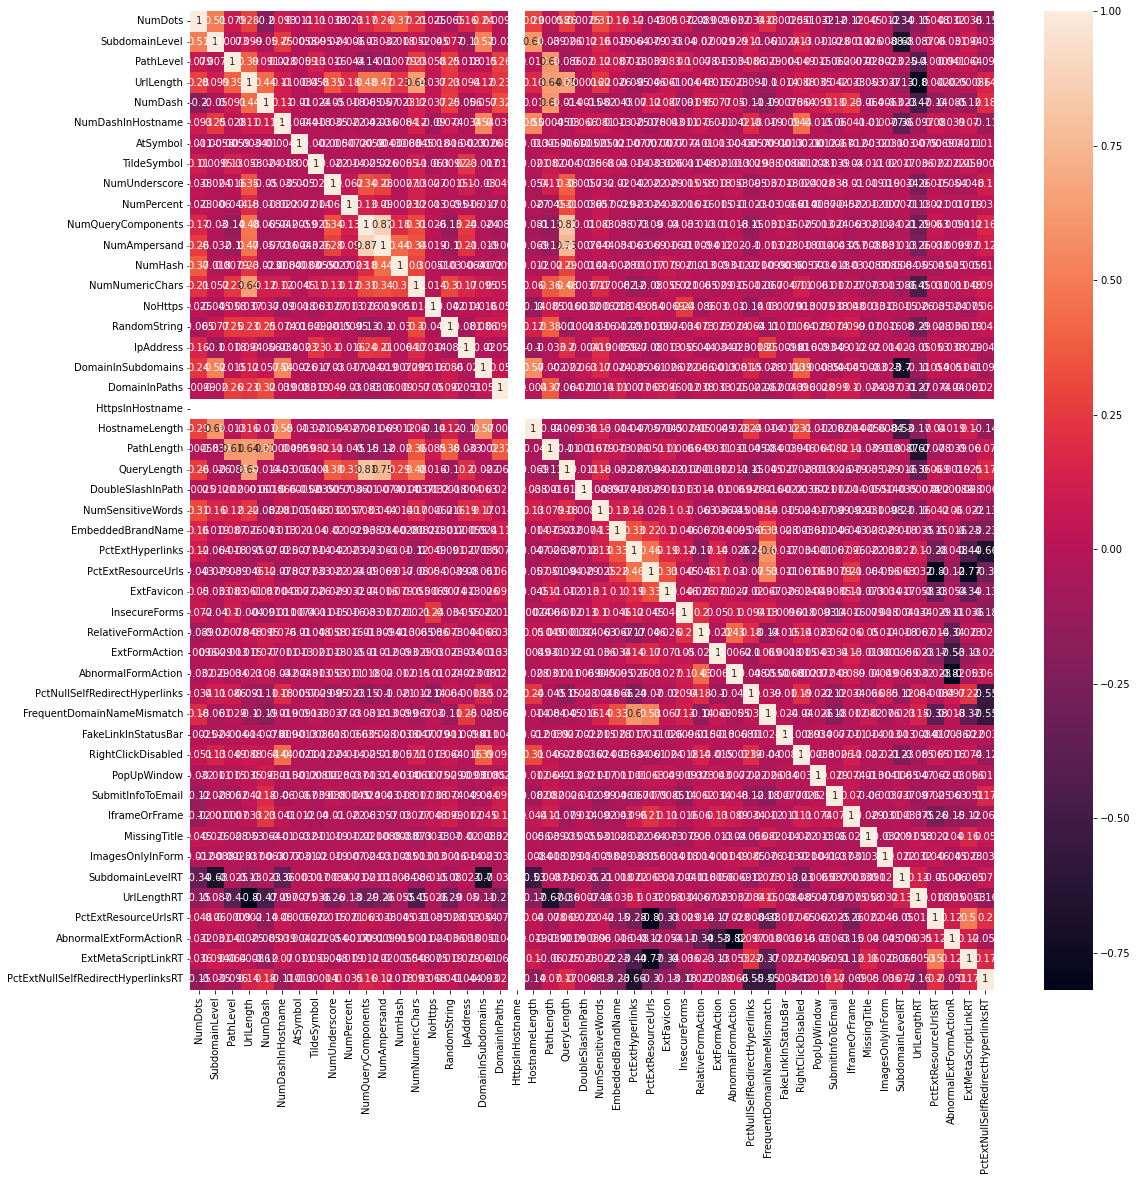

In [10]:
#looking at correlation between each feature
plt.figure(figsize=(18,18))
sns.heatmap(train.drop(['id', 'CLASS_LABEL'], axis=1).corr(),annot=True)

<AxesSubplot:>

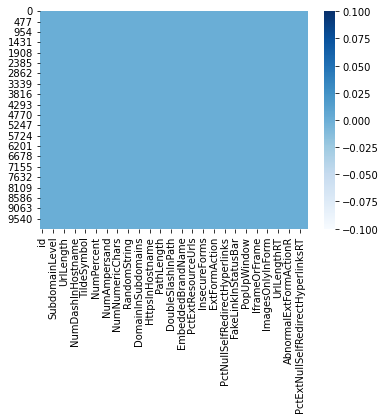

In [9]:
#Looking at the count of null values
sns.heatmap(train.isnull(),cmap='Blues')

Note: The dataset was already cleaned so null values

# Model building

In [12]:
#preparing the data for training
X = train.drop(columns = ['id', 'CLASS_LABEL','SubdomainLevelRT','UrlLengthRT','PctExtResourceUrlsRT','RandomString','ExtFormAction','AbnormalExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT','ImagesOnlyInForm'])
y = train['CLASS_LABEL']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#Testing on the following classifiers
classifiers = [RandomForestClassifier(),
               LogisticRegression(max_iter=1000),
               DecisionTreeClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "RandomForest", 1: "Logistic",2: "DecisionTree", 3:"KNN", 4:"SVC"}

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
# Cossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="f1", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

RandomForest: 0.982965 


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic: 0.936065 
DecisionTree: 0.964047 
KNN: 0.852869 
SVC: 0.830905 


We will use Random Forest, Logistic Regression & Decision tree for Voting Classifier

# Model Evaluation

In [22]:
# creating lists of varios scores
precision =[]
recall =[]
f1_scores = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_scores.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [23]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_scores,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["RandomForest", "LogisticRegression", "DecisionTree", "KNeighbours","SVC"])

In [25]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
RandomForest,0.984205,0.985178,0.984691,0.831000,0.822750
LogisticRegression,0.925926,0.938735,0.932287,0.831000,0.822750
DecisionTree,0.959024,0.971344,0.965145,0.831000,0.822750
KNeighbours,0.820976,0.897233,0.857413,0.831000,0.822750
SVC,0.786078,0.915020,0.845662,0.831000,0.822750


# Hard Voting Classifier

In [26]:
#Train the model using training data 
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
Classifier=VotingClassifier(estimators=[('lr',lr),('rf',rf),('dt',dt)],voting='hard')
Classifier.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [27]:
#Test the model using testing data
predictions = Classifier.predict(X_test)

In [28]:
#Test the model using testing data
predictions = Classifier.predict(X_test)
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.9804989418707843
Accuracy:  98.05
Matthews correlation coefficient: 0.9610146618602008


<AxesSubplot:>

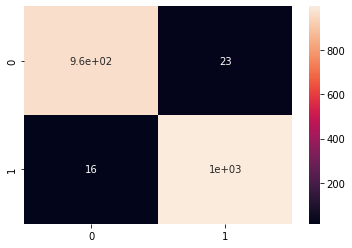

In [29]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

# Soft Voting Classifier

In [30]:
#Train the model using training data 
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
Classifier=VotingClassifier(estimators=[('lr',lr),('rf',rf),('dt',dt)],voting='soft')
Classifier.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [31]:
#Test the model using testing data
predictions = Classifier.predict(X_test)
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.9789994118847294
Accuracy:  97.89999999999999
Matthews correlation coefficient: 0.9579996014227284


In [37]:
import pickle  
y_pred = Classifier.predict(X_test)
pickle.dump(Classifier, open('model.pkl', 'wb'))

first_row = [3,2,7,178,1,0,0,0,2,0,4,3,0,21,0,0,1,0,0,15,108,46,1,0,1,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0]
column_names = [
    'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
    'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
    'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
    'NumNumericChars', 'NoHttps', 'IpAddress', 'DomainInSubdomains',
    'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength',
    'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords',
    'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls',
    'ExtFavicon', 'InsecureForms', 'RelativeFormAction',
    'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
    'FrequentDomainNameMismatch', 'FakeLinkInStatusBar',
    'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail',
    'IframeOrFrame', 'MissingTitle'
]
df2 = pd.DataFrame(columns=column_names)
row_id = 1
df2 = df2.append(pd.Series(first_row, index=column_names, name=row_id))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(df2)

array([0])

<AxesSubplot:>

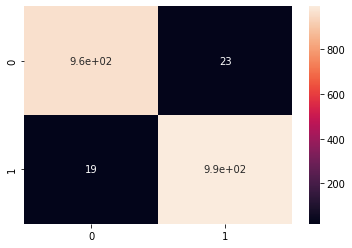

In [32]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

**If you liked this Notebook, please do upvote.**

**Any suggestions or questions, feel free to comment!**

**Best Wishes!**

In [39]:
predy = Classifier.predict(df2)
predy

array([0])